In [1]:
from striped.job import SinglePointStripedSession as Session, IPythonDisplay
from datasets import Datasets

from histbook import Hist, beside, groupby, below
from histbook import bin as hbin

job_server = ("dbwebdev.fnal.gov", 8765)

In [2]:
#__worker_class__

class Worker(object):

    def columns(self):
        return ["NJets"]

    def process(self, events, emit, params):
        dataset = params["dataset"]
        if dataset.startswith("Summer16."):
            dataset = dataset[9:]
        njets = events.NJets
        emit(NJets = njets, dataset=dataset)
        emit(n=njets)
        

In [5]:
session = Session(job_server)

h_by_dataset = Hist(hbin("NJets", 10, 0, 10), groupby("dataset", keeporder=True))
h_combined = Hist(hbin("NJets", 20, 0, 20))

disp = beside(
        h_by_dataset
            .stack("dataset")
            .area("NJets", width=300),
        h_combined
            .line("NJets", width=300, yscale={"type":"log"})
    )

display = IPythonDisplay(
    disp
)

last_callback = 0
def callback(typ, nevents, data):
    import json
    #print disp.to(json.dumps)
    display.update()

for dataset_name in Datasets[:5]:
    job = session.createJob(dataset_name, user_callback=callback, 
                            user_params = {"dataset":dataset_name})
    job.addHistogram(h_by_dataset, ["NJets", "dataset"], constants={"dataset":dataset_name})
    job.addHistogram(h_combined, "NJets")
    job.run()
    runtime = job.TFinish - job.TStart
    nevents = job.EventsProcessed
    print "%s: %.6f million events/second" % (dataset_name, nevents/runtime/1000000)
    display.update()



Header parsed: DXMessage(del='`', type='job_started', (), {'jid': 880.849, 'nworkers': 1})
body_hdr: ''
Header parsed: DXMessage(del='`', type='update', (), {'events_delta': 1215560, 'wid': 0})
body_hdr: '+`data:___h_7fe8422c81d0`390'
body_hdr: '+`data:___h_7fe8422c8190`440'
body_hdr: '+`data:n`1215560'
body_hdr: '\x03\x00\x00\x00\x04\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00\x05\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x06\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x03\x00\x00\x00\x05\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x06\x00\x00\x00\x05\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x05\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00\x04\x00\x00\x00\x04\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x04\x00\x00

ValueError: Can not parse attachment header: [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  	                                                                                                                                                                                                                                 	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                	                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ]

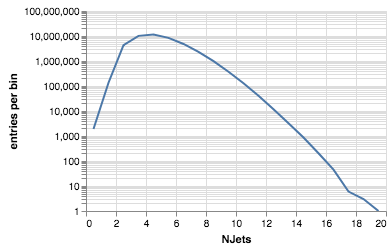

In [4]:
from vega import VegaLite

h_combined.line("NJets", width=300, yscale={"type":"log"}).to(VegaLite)

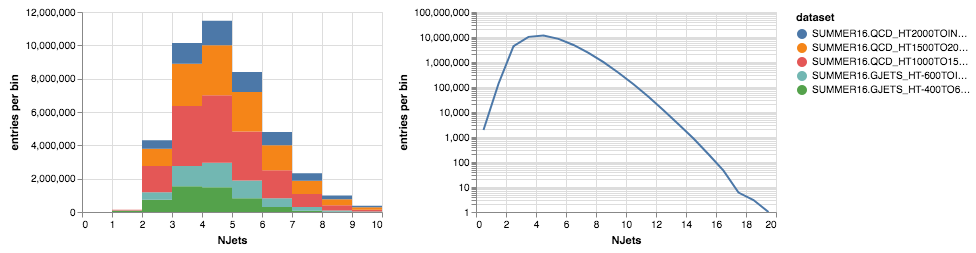

In [5]:
from vega import VegaLite
beside(
        h_by_dataset
            .stack("dataset")
            .area("NJets", width=300),
        h_combined
            .line("NJets", width=300, yscale={"type":"log"})
    ).to(VegaLite)

In [6]:
import json
from vega import VegaLite
beside(
        h_by_dataset
            .stack("dataset")
            .area("NJets", width=300),
        h_combined
            .line("NJets", width=300, yscale={"type":"log"})
    ).to(json.dumps)

'{"$schema": "https://vega.github.io/schema/vega-lite/v2.json", "data": {"values": [{"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 0.0, "b1": 0.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 1649.0, "b1": 1e-09}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 73887.0, "b1": 1.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 730974.0, "b1": 2.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 1549992.0, "b1": 3.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 1488282.0, "b1": 4.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 819667.0, "b1": 5.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 293552.0, "b1": 6.0}, 